# Домашнее задание №32

Исполнитель: Abdurahmonova Marjona

### Задача №1
На основе данных из таблицы track создайте столбчатую диаграмму, показывающую общую сумму минут (длительность треков) в разбивке по жанрам.

In [56]:
import psycopg2
import matplotlib.pyplot as plt

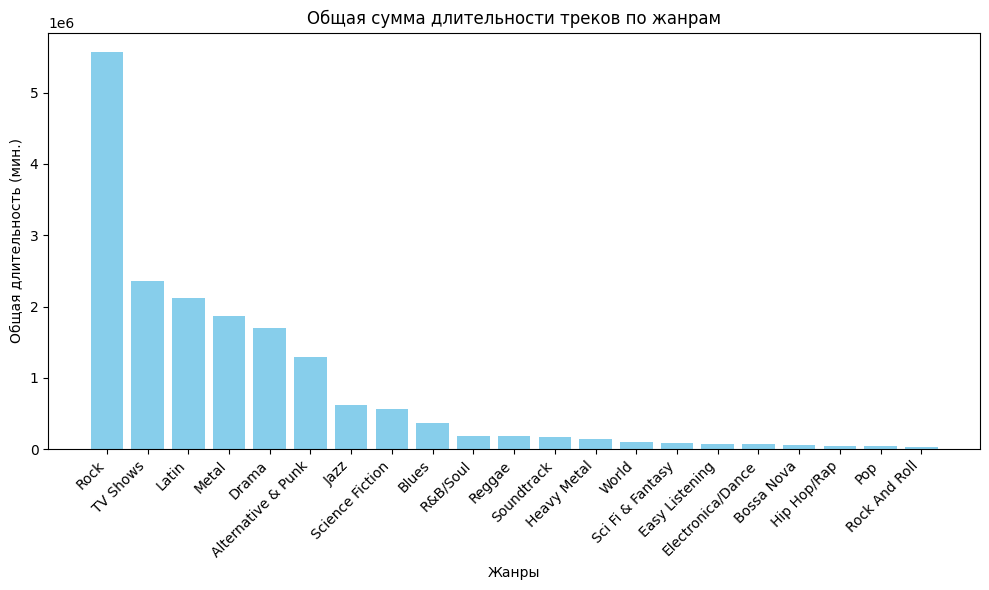

In [58]:
cur = conn.cursor()

cur.execute("""
    SELECT g.name, SUM(t.milliseconds) / 60 AS total_minutes
    FROM track t
    JOIN genre g ON t.genre_id = g.genre_id
    GROUP BY g.name
    ORDER BY total_minutes DESC;
""")

data = cur.fetchall()

cur.close()
conn.close()

genres = [row[0] for row in data]
total_minutes = [row[1] for row in data]

plt.figure(figsize=(10, 6))
plt.bar(genres, total_minutes, color='skyblue')
plt.xlabel('Жанры')
plt.ylabel('Общая длительность (мин.)')
plt.title('Общая сумма длительности треков по жанрам')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

### Задача №2
На основе данных из таблицы track создайте диаграмму рассеивания, показывающую соотношение минут и мегабайтов.

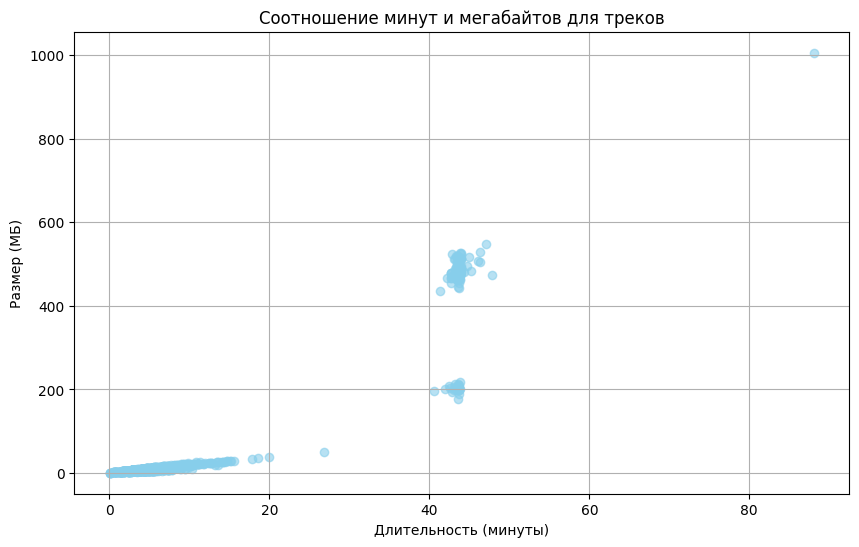

In [63]:
cur = conn.cursor()

cur.execute("""
    SELECT t.milliseconds, t.bytes
    FROM track t;
""")

data = cur.fetchall()

cur.close()
conn.close()

minutes = [row[0] / 60000 for row in data]
mb = [row[1] / 1048576 for row in data]

plt.figure(figsize=(10, 6))
plt.scatter(minutes, mb, color='skyblue', alpha=0.6)
plt.xlabel('Длительность (минуты)')
plt.ylabel('Размер (МБ)')
plt.title('Соотношение минут и мегабайтов для треков')
plt.grid(True)

plt.show()

### Задача №3
На основе данных из таблицы invoice создайте коробчатую диаграмму, показывающую распределение дохода (поле total) в разбивке по странам.

In [60]:
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

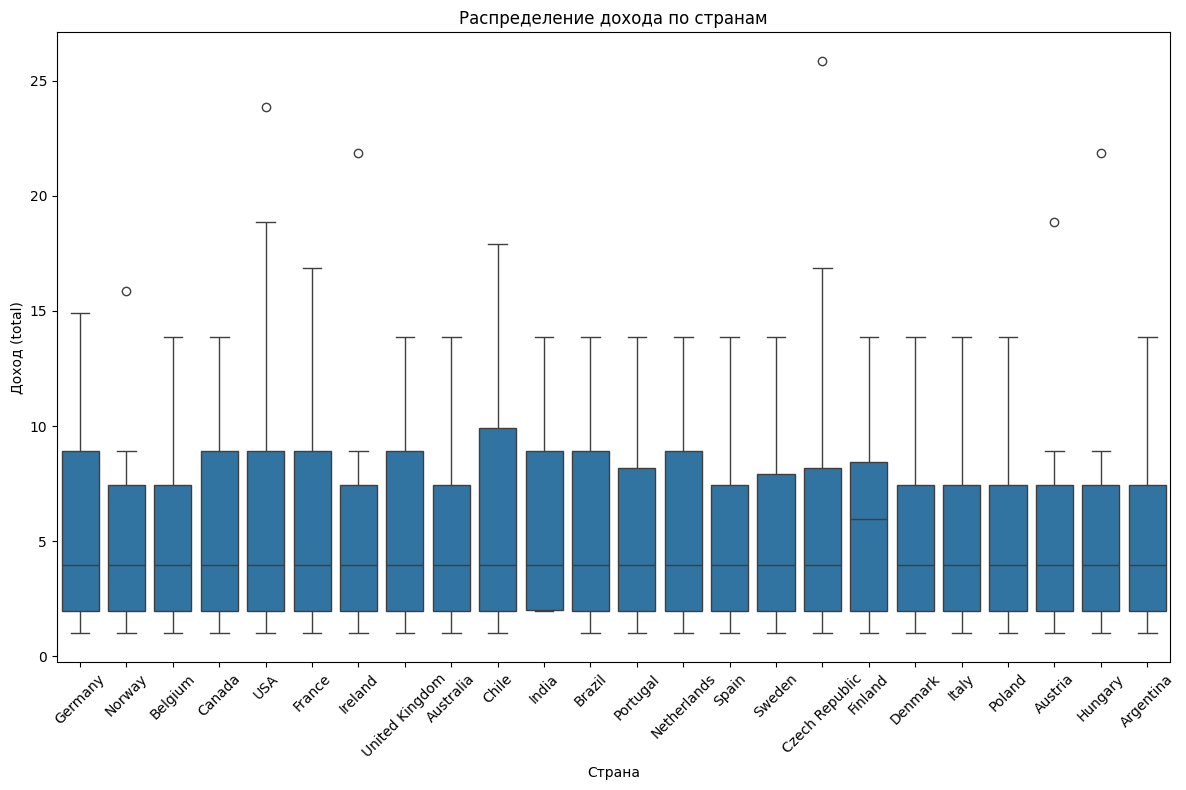

In [73]:
cur = conn.cursor()

cur.execute("""
    SELECT i.total, i.billing_country
    FROM invoice i;
""")

data = cur.fetchall()

cur.close()
conn.close()

df = pd.DataFrame(data, columns=['total', 'billing_country'])

plt.figure(figsize=(12, 8))
sns.boxplot(x='billing_country', y='total', data=df)
plt.xlabel('Страна')
plt.ylabel('Доход (total)')
plt.title('Распределение дохода по странам')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Задача №4
На основе данных из таблицы invoice создайте линейчатую диаграмму, показывающую изменение дохода по месяцам за 2025 год.

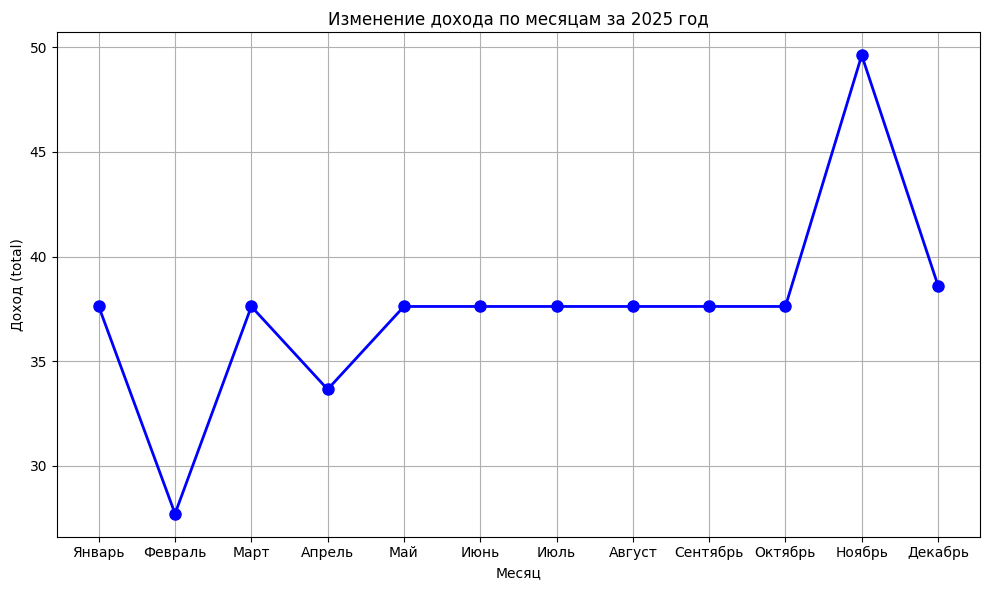

In [69]:
cur = conn.cursor()

cur.execute("""
    SELECT EXTRACT(MONTH FROM i.invoice_date) AS month, SUM(i.total) AS total_income
    FROM invoice i
    WHERE EXTRACT(YEAR FROM i.invoice_date) = 2025
    GROUP BY month
    ORDER BY month;
""")

data = cur.fetchall()

cur.close()
conn.close()

df = pd.DataFrame(data, columns=['month', 'total_income'])

plt.figure(figsize=(10, 6))
plt.plot(df['month'], df['total_income'], marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Месяц')
plt.ylabel('Доход (total)')
plt.title('Изменение дохода по месяцам за 2025 год')
plt.xticks(df['month'], ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'])
plt.grid(True)

plt.tight_layout()
plt.show()

### Задача №5
На основе данных из таблицы invoice, создайте круговую диаграмму, показывающую соотношение продаж в США и в остальном мире. Т.е. ваша круговая диаграмма должна состоять лишь из двух секций: США и остальной мир.

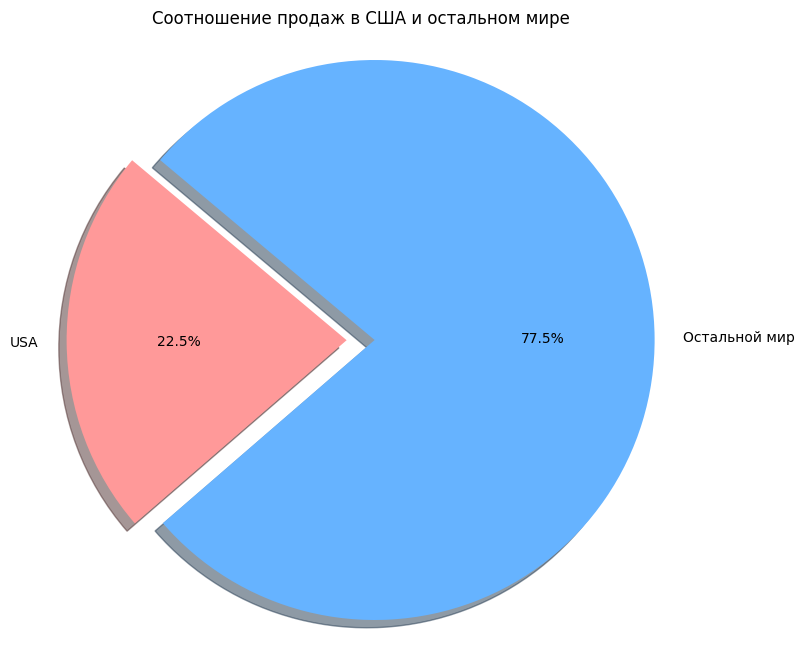

In [71]:
cur = conn.cursor()

cur.execute("""
    SELECT i.total, i.billing_country
    FROM invoice i;
""")

data = cur.fetchall()

cur.close()
conn.close()

df = pd.DataFrame(data, columns=['total', 'billing_country'])

sales_by_country = df.groupby('billing_country')['total'].sum()

us_sales = sales_by_country.get('USA', 0)
other_sales = sales_by_country.sum() - us_sales 

labels = ['USA', 'Остальной мир']
sizes = [us_sales, other_sales]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0) 

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Соотношение продаж в США и остальном мире')

plt.axis('equal')
plt.show()